# Projeto de Aprendizado de Máquina

### 2º semestre de 2022

#### Grupo formado por:
        Ana Clara Loponi - 220073
        Ana Clara Brandão - 220069
        Heitor Bernardes - 220052
        Lorraine Casseano - 220036
    
### Preparação dos Dados: Tratamento de Dados e Normalização 

<ht> Idealmente, o projeto consiste em treinar uma máquina para prever possíveis surtos de dengue. Inicialmente, vamos usar dados coletados em Campinas, São Paulo, dos anos de 1998 à 2014 p/ mês, referentes ao número de casos confirmados, volume de chuva (em mm), temperatura mínima, temperatura máxima e temperatura média. 

In [126]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [127]:
dados1 = pd.read_excel("dataset_dengue.xlsx") # Lendos os dados.

dados1.dtypes # Este comando informa quais os tipos de dados o dataframe contém.

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

### Testando as formas de normalização

In [128]:
#padrão - teste
dados2 = dados1.copy()

media_chuva = dados2['chuva'].mean()
desvio_padrao_chuva = dados2['chuva'].std()

dados2['chuva_zscore'] = (dados2['chuva'] - media_chuva) / desvio_padrao_chuva

#print(dados2)

In [129]:
#maximo_absoluto
dados3 = dados1.copy()

maximo_absoluto = dados3['chuva'].max()

dados3['chuva_max_abs'] = dados3['chuva'] / maximo_absoluto

#print(dados3)

### Normaliação por Máximo e Mínimo Absoluto

In [130]:
#maximo_e_minimo_absoluto
#chuva
dados4 = dados1.copy()

maximo_chuva = dados4['chuva'].max()
minimo_chuva = dados4['chuva'].min()

dados4['chuva_min_max_abs'] = (dados4['chuva'] - minimo_chuva) / (maximo_chuva - minimo_chuva)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  
0                    20.2                28.1           0.395760  
1                    20.0                28.0           0.499779  
2                    22.4                2

In [131]:
#temperatura

maximo_temp_med = dados4['temperatura-media'].max()
minimo_temp_med = dados4['temperatura-media'].min()

dados4['temp-med_min_max_abs'] = (dados4['temperatura-media'] - minimo_temp_med) / (maximo_temp_med - minimo_temp_med)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [132]:
#temperatura_mínima

maximo_temp_min = dados4['temperatura-mininima'].max()
minimo_temp_min = dados4['temperatura-mininima'].min()

dados4['temp-min_min_max_abs'] = (dados4['temperatura-mininima'] - minimo_temp_min) / (maximo_temp_min - minimo_temp_min)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [133]:
#tempertura_máxima

maximo_temp_max = dados4['temperatura-maxima'].max()
minimo_temp_max = dados4['temperatura-maxima'].min()

dados4['temp-max_min_max_abs'] = (dados4['temperatura-maxima'] - minimo_temp_max) / (maximo_temp_max - minimo_temp_max)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [134]:
#casos_confirmados

maximo_casos = dados4['casos-confirmados'].max()
minimo_casos = dados4['casos-confirmados'].min()

dados4['casos_min_max_abs'] = (dados4['casos-confirmados'] - minimo_casos) / (maximo_casos - minimo_casos)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [135]:
#Identificamos o número de linhas do nosso dataset como índices, pois entendemos a quantidade de meses durante os anos de 1998 à 2014 como uma feature. 
#Assim, ao invés de agruparmos por data, agrupamos por meses a partir de Janeiro/1998, facilitando a resolução do problemas.

print(dados1.index)

RangeIndex(start=0, stop=204, step=1)


### Análise Exploratória dos Dados

In [136]:
#Média de cada coluna de dados

M1 = dados1["casos-confirmados"].mean()

M2 = dados1["chuva"].mean()

M3 = dados1["temperatura-mininima"].mean()

M4 = dados1["temperatura-maxima"].mean()

print(M1, M2, M3, M4)

357.53921568627453 112.07549019607842 17.679411764705883 25.565196078431374


In [137]:
#Desvio Padrão

D1 = dados1["casos-confirmados"].std()

D2 = dados1["chuva"].std()

D3 = dados1["temperatura-mininima"].std()

D4 = dados1["temperatura-maxima"].std()

print(D1, D2, D3, D4)

1741.8147587005246 97.3904390734082 3.336315723659817 2.2498635888116434


Observando esses resultados, concluimos que eles não eram satisfatórios, e não forneciam as informações que precisavamos. Por isso, optamos por uma análise diferente, fazendo uma separação referente aos meses, de forma que as médias sejam separadas em média_janeiro, média_fevereiro, média_março e assim por diante.

In [147]:
dados5 = dados1.drop(columns = ['data'], axis = 1)
print(dados5)

     casos-confirmados  chuva  temperatura-media  temperatura-mininima  \
0                  237  179.2               25.7                  20.2   
1                  331  226.3               25.1                  20.0   
2                  562  149.1               24.8                  22.4   
3                  187   46.4               22.7                  18.1   
4                   32   88.3               19.2                  15.7   
..                 ...    ...                ...                   ...   
199                 55   12.2               20.6                  13.1   
200                 40   69.2               23.0                  18.6   
201                 40   15.6               24.7                  17.2   
202                 57  154.8               25.0                  22.1   
203                 37  232.8               24.9                  21.3   

     temperatura-maxima  
0                  28.1  
1                  28.0  
2                  27.2  
3      

In [152]:
#Separando os dados e colocando-os em listas iteraveis

conv = dados5.values.tolist() # função que transforma de dataset para lista

casos = []
chuva = []
tem_med = []
tem_max = []
tem_min = []

for i in conv:
    for j in range(0, len(i), 5):
        casos.append(i[j])

for i in conv:
    for j in range(1, len(i), 5):
        chuva.append(i[j])
        
for i in conv:
    for j in range(2, len(i), 5):
        tem_med.append(i[j])
        
for i in conv:
    for j in range(3, len(i), 5):
        tem_min.append(i[j])
        
for i in conv:
    for j in range(4, len(i), 5):
        tem_max.append(i[j])
        

#print(casos)
#print(chuva)
#print(tem_med)
#print(tem_min) 
#print(tem_max)

In [153]:
def separacao(x, c):
    
    """ Separa os dados por mês e calcula a média e desvio padrão """
    
    if c >= 12: # Critério de parada
        return 0 
    
    else:

        lista = []  # Para armazernar e processar os dados 
        lista2 = []
    
        for i in range(c,len(x),12): # Separa os dados por meses, fazendo uma listagem dos dados com um intervalo de 12 itens
            lista.append(x[i])
    
    m = np.mean(lista) # função do numpy para calculo de media 
    dp = np.std(lista) # função do numpy para calculo de desvio padrão
    lista2.append(m)
    lista2.append(dp)
    
        
    lista.clear() # Ao final da operação, a lista é esvaziada para não ter problemas
    
    print(lista2)
    
    return separacao(x, c + 1)  # Usei recursão para seguir calculando para os demais meses  

In [154]:
# Variável para servir de inicio para a contagem
contagem = 0 
print(separacao(casos, contagem))
print(separacao(chuva, contagem))
print(separacao(tem_med, contagem))
print(separacao(tem_min, contagem))
print(separacao(tem_max, contagem))

[84.29411764705883, 86.19387497406636]
[271.7647058823529, 420.0032954228931]
[919.1764705882352, 1844.583493088827]
[1829.5294117647059, 4778.14081635312]
[955.7058823529412, 2456.901031421635]
[142.41176470588235, 313.971909351126]
[21.529411764705884, 35.72627579257206]
[11.176470588235293, 12.825687891734844]
[10.0, 12.874964306061315]
[11.588235294117647, 14.641033487827816]
[12.588235294117647, 17.425670123090082]
[20.705882352941178, 21.545477772765853]
0
[282.5705882352941, 95.64846645371841]
[166.11176470588236, 74.13112295792814]
[142.89999999999998, 68.48547291214393]
[66.31764705882354, 50.1849899670517]
[60.911764705882355, 39.86528612793697]
[43.017647058823535, 38.37982367145403]
[41.811764705882354, 45.09142193566234]
[22.735294117647058, 24.262315033727674]
[54.182352941176475, 33.761224456713784]
[105.63529411764705, 65.00958247173095]
[151.8470588235294, 77.03406517399841]
[206.86470588235295, 71.59512751393788]
0
[24.205882352941178, 1.0849074713786824]
[24.81176470

<AxesSubplot:>

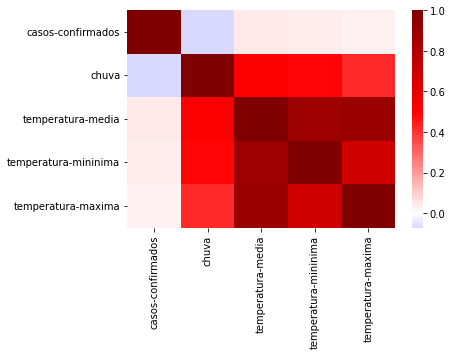

In [155]:
#matriz de correlação
# Conexão entre dois fatores para compreender as informações e dependências entre as features.
# Os coeficientes de correlação são padronizados. A correlação mede tanto a força como a direção da relação linear entre duas variáveis

dados_corr = dados1.corr()
dados_corr
sns.heatmap(dados_corr, cmap='seismic', center=0)

### Gráficos

In [145]:
#Carregando o Dataset
iris = sns.load_dataset('iris')

#visualização das linhas do dataset
dados1.head(5)

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


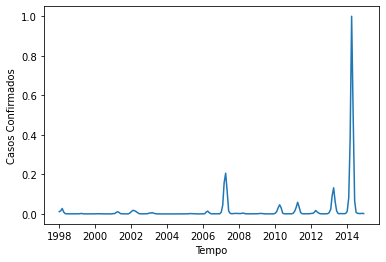

In [146]:
#dados1["casos-confirmados"] = np.log10(dados1["casos-confirmados"])

plt.plot(dados4['data'], dados4['casos_min_max_abs'])
plt.xlabel('Tempo')
plt.ylabel('Casos Confirmados')
plt.show()

#plt.bar(dados1['data'],dados1['casos-confirmados'])